In [53]:
import sys
sys.path.append('../')
import base
import matplotlib.pyplot as plt
import numpy as np
import path_analysis

In [2]:
root_path = ['../FS04/Visual/']*4
tags = ['20210315-102910', '20210317-114106', '20210319-194911', '20210329-164553']
visual_perturbation = base.MultiDaysBeaconPosition(root_path, tags, has_beacon = True, has_metadata= True)


/opt/homebrew/Caskroom/miniforge/base/envs/rearing/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
## Basic statistics

Text(0, 0.5, 'Frame counts')

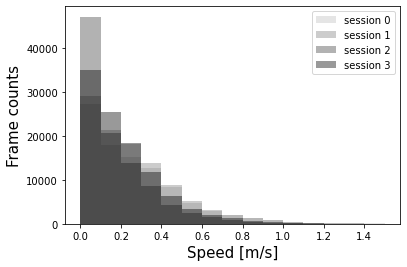

In [3]:
for i in range(4):
    plt.hist(visual_perturbation.dataset_list[i].speed, bins = 15, range = (0, 1.5), alpha = 0.1*i+0.1, color = 'k' , label = f'session {i}')
plt.legend()
plt.xlabel('Speed [m/s]', fontsize = 15)
plt.ylabel('Frame counts', fontsize = 15)

In [5]:
for i, dist in enumerate(visual_perturbation.distance_per_session):
    print(f'For session {i}, total distance the rat traveled is: {dist} [m]')

For session 0, total distance the rat traveled is: 463.01315838922915 [m]
For session 1, total distance the rat traveled is: 497.4239439662466 [m]
For session 2, total distance the rat traveled is: 294.2426183678284 [m]
For session 3, total distance the rat traveled is: 393.74270067080187 [m]


In [5]:
x_max, x_min = 0.2, -0.76
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 0.072,  -1.754
y_offset = y_max - (y_max - y_min)/2

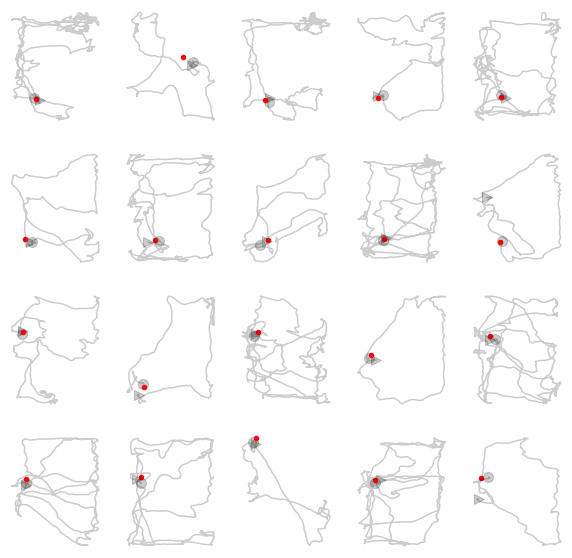

In [50]:
fig=plt.figure(figsize = (10,10))
for i, (trial_list, beacon_list, visible_list) in enumerate(zip(visual_perturbation.trial_list, visual_perturbation.beacon_list, visual_perturbation.trial_visible)):
    for k,t in enumerate(trial_list[1:]):
        plt.subplot(4,5, k+1)
        plt.plot(t[:,1], t[:,2], color = 'k', alpha = i*0.1+0.2)
        plt.scatter(t[0,1], t[0,2], c = 'k', marker = 'o', s = 100, alpha = i*0.1+0.2)
        plt.scatter(t[-1,1], t[-1,2], c= 'k', marker = '>', s = 100, alpha = i*0.1+0.2)
        plt.scatter(beacon_list[k,0]+x_offset, beacon_list[k,1]-y_offset, c = 'red', s = 20)
        plt.axis('off')
        if k+1 == 20:
            break
    break
            

In [54]:
straightness_moment = path_analysis.straightness_moment_time(visual_perturbation.trial_list[0][1][:,:3], before_time=2)
straightness_time = path_analysis.straightness_over_time(visual_perturbation.trial_list[0][1][:,:3], before_time=2)

Ratio: 0.7636793409213065


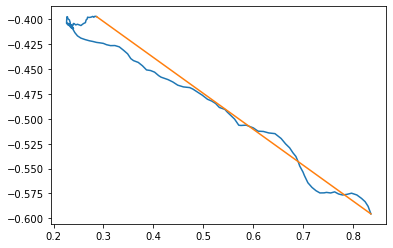

In [56]:
plt.plot(straightness_moment[2][:,0], straightness_moment[2][:,1])
plt.plot(straightness_moment[1][:,0], straightness_moment[1][:,1])
print(f'Ratio: {straightness_moment[0]}')

In [75]:
straightness_time

Invisible trial straightness is red, visible trials are in gray


/Users/jin/Multiple_trial_analysis/refactoring/demo_notebook/../path_analysis.py:76: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)


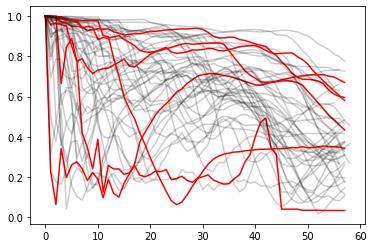

In [93]:
session_num = 0
for i in range(len(visual_perturbation.trial_list[session_num])):
    straightness_moment = path_analysis.straightness_moment_time(visual_perturbation.trial_list[session_num][i][:,:3], before_time=1)
    straightness_time = path_analysis.straightness_over_time(visual_perturbation.trial_list[session_num][i][:,:3], before_time=1)
    
    if straightness_time == None:
        print(i)
        continue
    
    if visual_perturbation.trial_visible[session_num][i]:
        plt.plot(straightness_time[0], c = 'k', alpha = 0.2)
    else:
        plt.plot(straightness_time[0], c='red')
    
print('Invisible trial straightness is red, visible trials are in gray')

In [94]:
session_num = 0
trial_num = 0
bootstrap_sliding_window=path_analysis.bootstrap(visual_perturbation.trial_list[session_num][trial_num], num_sampling=10, time_window=2, straightness_type = 'sliding')